<a href="https://colab.research.google.com/github/MOSTAFA1172m/AI_paltforms/blob/main/assignment_Ai_paltforms_Mostafa_Hazem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

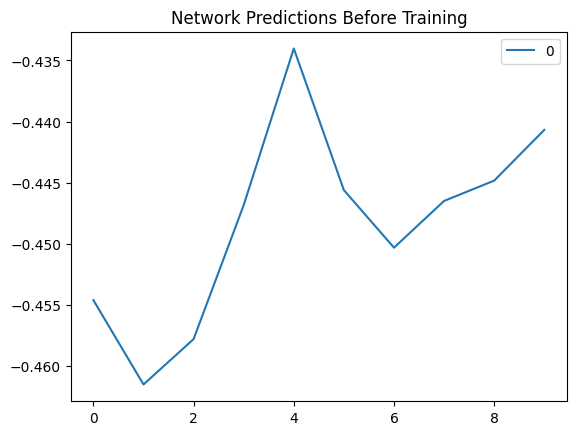

In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.fc1 = nn.Linear(3, 3)
        self.fc2 = nn.Linear(3, 1)


        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):

        x = self.sigmoid(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x

model = SimpleNN()

x = torch.rand((10, 3))  # Input tensor with shape (batch_size, input_size)
initial_output = model(x).detach().numpy()

sns.lineplot(data=initial_output)
plt.title('Network Predictions Before Training')
plt.show()

#### $Making$ $the$ $network$ $more$ $trainable$ $.$

In [2]:
for param in model.parameters():
    param.requires_grad = True

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

y_true = torch.rand((10, 1))

#### $Training$ $loop$ $.$

In [5]:
# Training loop
epochs = 100
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(x)

    # Compute the loss
    loss = loss_fn(output, y_true)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print the loss after each epoch

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/100, Loss: 0.10669004917144775
Epoch 2/100, Loss: 0.1062290295958519
Epoch 3/100, Loss: 0.10578391700983047
Epoch 4/100, Loss: 0.10535403341054916
Epoch 5/100, Loss: 0.10493876785039902
Epoch 6/100, Loss: 0.10453753173351288
Epoch 7/100, Loss: 0.10414975881576538
Epoch 8/100, Loss: 0.10377492755651474
Epoch 9/100, Loss: 0.10341250896453857
Epoch 10/100, Loss: 0.10306201875209808
Epoch 11/100, Loss: 0.10272300243377686
Epoch 12/100, Loss: 0.10239502042531967
Epoch 13/100, Loss: 0.10207762569189072
Epoch 14/100, Loss: 0.10177043825387955
Epoch 15/100, Loss: 0.10147307068109512
Epoch 16/100, Loss: 0.10118510574102402
Epoch 17/100, Loss: 0.10090626776218414
Epoch 18/100, Loss: 0.10063614696264267
Epoch 19/100, Loss: 0.1003744974732399
Epoch 20/100, Loss: 0.10012093931436539
Epoch 21/100, Loss: 0.09987520426511765
Epoch 22/100, Loss: 0.0996369943022728
Epoch 23/100, Loss: 0.09940606355667114
Epoch 24/100, Loss: 0.09918215125799179
Epoch 25/100, Loss: 0.09896498918533325
Epoch 26/100

#### $Predictions$ $before$ $and$ $after$ $Training$ $.$

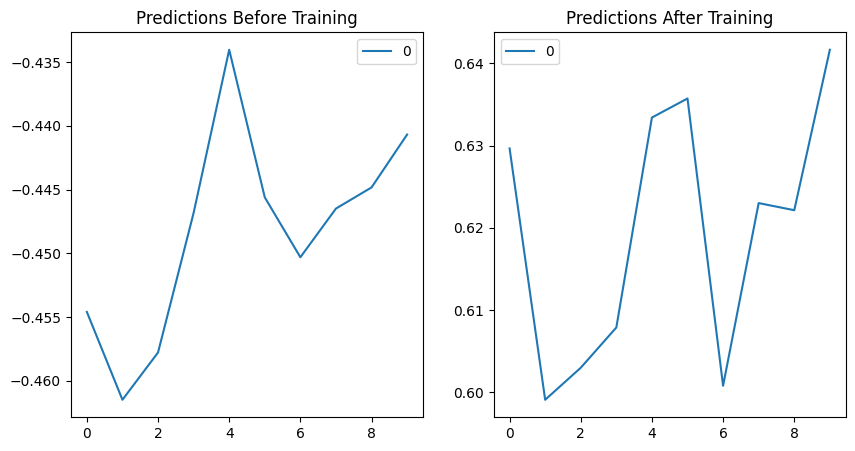

In [6]:
final_output = model(x).detach().numpy()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=initial_output, ax=axs[0])
axs[0].set_title('Predictions Before Training')

sns.lineplot(data=final_output, ax=axs[1])
axs[1].set_title('Predictions After Training')

plt.show()